# PREDIKSI STATUS STOK PENJUALAN PRODUK BOLEN CRISPY

## IMPORT PACKAGES

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# import numpy and pandas for data manipulating and data analysis
import pandas as pd
import numpy as np

# import matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

#import scikit learn for modelling
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#scikit learn for model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

# scikit learn for categorical variables
from sklearn.preprocessing import LabelEncoder

# scikit learn for scaling
from sklearn.preprocessing import StandardScaler, RobustScaler

# file system management
import os

In [ ]:
df = pd.read_csv('dataset_bolen_2021_2024.csv')

## DATA PREPROCESSING

### 1. Identifikasi Struktur Dataset

In [ ]:
# Menampilkan 5 baris pertama dari DataFrame
df.head()

,Tanggal,Hari,Nama Produk,Harga Satuan,Jumlah Terjual,Stok Produk
0,1/08/2021,Minggu,Bolen Coklat,23000,38,130
1,2/08/2021,Senin,Bolen Banana,23000,80,125
2,3/08/2021,Selasa,Bolen Proltape,23000,45,89
3,4/08/2021,Rabu,Bolen Coklat Keju,12000,149,150
4,5/08/2021,Kamis,Bolen Cokju (Mini),12000,118,118


In [ ]:
# Menampilkan 5 baris terakhir dari DataFrame
df.tail()

,Tanggal,Hari,Nama Produk,Harga Satuan,Jumlah Terjual,Stok Produk
1091,27/07/2024,Sabtu,Bolen Pisang Coklat,23000,43,63
1092,28/07/2024,Minggu,Bolen Coklat,23000,50,68
1093,29/07/2024,Senin,Bolen Banana,23000,33,116
1094,30/07/2024,Selasa,Bolen Proltape,23000,31,165
1095,31/07/2024,Rabu,Bolen Coklat Keju,12000,52,52


In [ ]:
# Menampilkan jumlah kolom dan baris dalam DataFrame
print("Dataset ini berisi %.f kolom dan %.f baris" %(df.shape[1], df.shape[0]))

Dataset ini berisi 6 kolom dan 1096 baris


In [ ]:
# Menampilkan jumlah data duplikat dalam DataFrame
print('Data ini memiliki %.f data duplikat' %df.duplicated().sum())

Data ini memiliki 0 data duplikat


Output diatas menunjukan dataset ini tidak memiliki data duplikat, yang berarti setiap entri bersifat unik dan tidak ada pengulangan informasi. Hal ini menunjukkan bahwa kualitas data cukup baik dan tidak memerlukan proses pembersihan terkait duplikasi data.

In [ ]:
# Menampilkan jumlah nilai yang hilang (missing value) pada setiap kolom
print("Menghitung missing value:")
print(df.isnull().sum())

Menghitung missing value:
Tanggal           0
Hari              0
Nama Produk       0
Harga Satuan      0
Jumlah Terjual    0
Stok Produk       0
dtype: int64


Seluruh kolom dalam dataset ini tidak memiliki missing value, yang berarti tidak ada data yang hilang. Ini menunjukkan bahwa dataset lengkap dan bisa digunakan untuk analisis dan pemodelan tanpa perlu melakukan imputasi atau penanganan nilai kosong.

In [ ]:
# Menampilkan informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tanggal         1096 non-null   object
 1   Hari            1096 non-null   object
 2   Nama Produk     1096 non-null   object
 3   Harga Satuan    1096 non-null   int64 
 4   Jumlah Terjual  1096 non-null   int64 
 5   Stok Produk     1096 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 51.5+ KB


Dari informasi diatas terdapat tiga kolom bertipe numerik yaitu Jumlah Terjual, Total Harga, dan Stok Produk, sedangkan tiga lainnya bertipe objek, yaitu Tanggal, Hari, dan Nama Produk. Untuk memudahkan analisis selanjutnya, kolom Tanggal akan dikonversi ke dalam format datetime lalu dikonversi lagi ke bentuk integer dan kolom Hari akan dikonversi ke dalam bentuk integer.

### 2. Konversi Tipe Data

In [ ]:
# Mengubah tipe data kolom tanggal menjadi datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)

# Mengubah tipe data kolom tanggal menjadi integer
df['Tanggal Int'] = df['Tanggal'].astype('int64') // 10**6

Kolom Tanggal awalnya memiliki format string yang perlu dikonversi agar bisa digunakan dalam analisis dan pemodelan machine learning. Oleh karena itu, kolom ini terlebih dahulu diubah menjadi tipe data datetime agar data bisa dianalisis berdasarkan waktu seperti melihat tren bulanann atau mingguan.  Setelah itu, kolom Tanggal yang telah menjadi datetime dikonversi lagi menjadi bentuk numerik (integer). Hasil konversi ini disimpan dalam kolom baru bernama Tanggal Int.

In [ ]:
# Konversi nama hari jadi angka
mapping_hari = {
    'Senin': 1,
    'Selasa': 2,
    'Rabu': 3,
    'Kamis': 4,
    'Jumat': 5,
    'Sabtu': 6,
    'Minggu': 7
}

df['Hari'] = df['Hari'].map(mapping_hari)

print(df[['Hari']].head(7))

   Hari
0     7
1     1
2     2
3     3
4     4
5     5
6     6


Nama hari dikonversi menjadi angka untuk mempermudah proses analisis dan pemodelan karena model machine learning dan analisis statistik tidak bisa memproses data kategorikal bertipe string secara langsung. Dengan mengubah nama hari menjadi nilai numerik, kita dapat melakukan analisis untuk mengenali pola dari fitur tersebut.

### Visualisasi Penjualan Produk

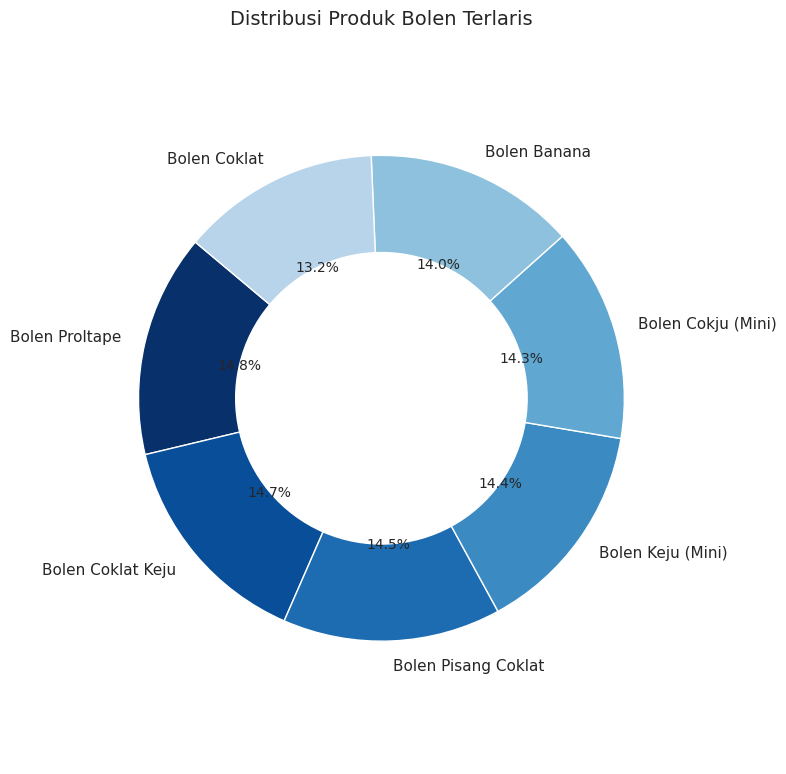

In [ ]:
# Menampilkan persentase penjualan tiap produk bolen dalam bentuk pie chart
product = df.groupby('Nama Produk')['Jumlah Terjual'].sum().sort_values(ascending=False)

cmap = plt.get_cmap('Blues')
colors = cmap(np.linspace(1, 0.3, len(product)))


plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    product.values,
    labels=product.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

plt.setp(autotexts, size=10)
plt.title('Distribusi Produk Bolen Terlaris', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa semua varian produk bolen memiliki proporsi penjualan yang cukup merata, dengan Bolen Proltape menjadi yang paling laris sebesar 14,8%. Perbedaan antar produk tidak terlalu signifikan, yang menunjukkan bahwa seluruh varian bolen memiliki minat pasar yang relatif seimbang. Hal ini dapat menjadi peluang untuk mempertahankan ketersediaan semua varian secara konsisten.


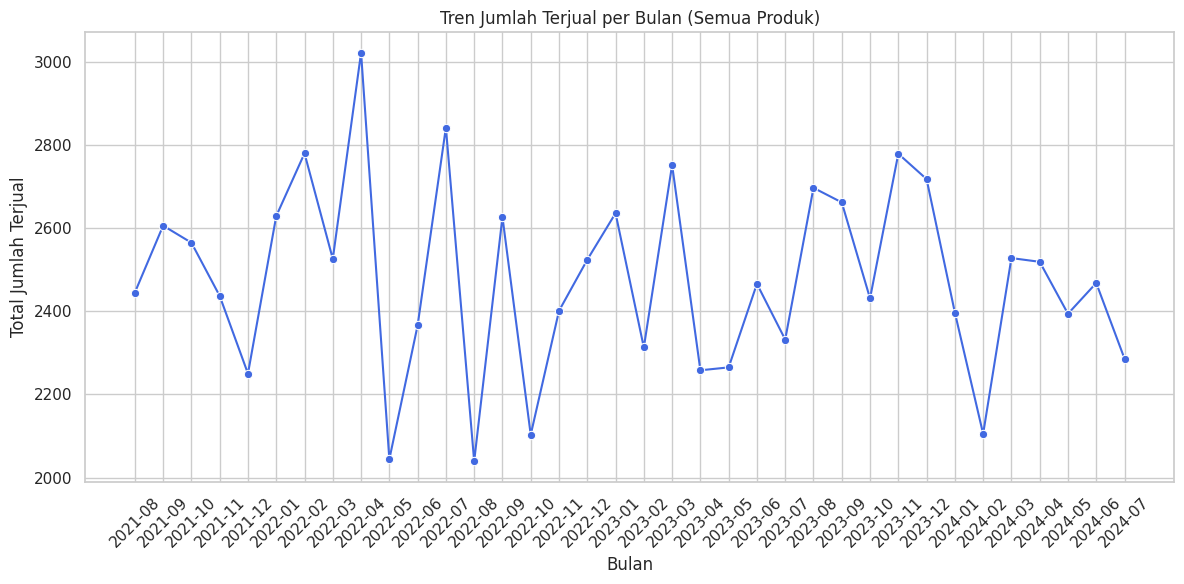

In [ ]:
# Menampilkan tren penjualan bulanan semua produk dalam bentuk line chart
monthly_sales = (
    df
    .assign(Bulan=df['Tanggal'].dt.to_period('M'))
    .groupby('Bulan')['Jumlah Terjual']
    .sum()
    .reset_index()
)

monthly_sales['Bulan'] = monthly_sales['Bulan'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_sales,
    x='Bulan',
    y='Jumlah Terjual',
    marker='o',
    color='royalblue'
)

plt.title('Tren Jumlah Terjual per Bulan (Semua Produk)')
plt.xlabel('Bulan')
plt.ylabel('Total Jumlah Terjual')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, terlihat adanya fluktuasi yang cukup signifikan dari Agustus 2021 hingga Juli 2024. Terdapat beberapa lonjakan penjualan, salah satunya pada Maret 2022 yang mencapai angka tertinggi lebih dari 3.000 unit terjual. Namun, penurunan drastis juga terjadi pada beberapa bulan seperti Mei 2022 dan September 2022. Secara umum, tren penjualan cenderung tidak stabil dan mengalami siklus naik-turun dari tahun ke tahun, namun ada indikasi penurunan penjualan yang lebih konsisten mulai dari awal 2024.

### Statistik Deskriptif

In [ ]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame
df.describe()

,Tanggal,Hari,Harga Satuan,Jumlah Terjual,Stok Produk,Tanggal Int
count,1096,1096.000000,1096.000000,1096.000000,1096.000000,1.096000e+03
mean,2023-01-30 12:00:00,3.997263,18292.883212,81.397810,129.081204,1.675080e+12
min,2021-08-01 00:00:00,1.000000,12000.000000,10.000000,10.000000,1.627776e+12
25%,2022-05-01 18:00:00,2.000000,12000.000000,45.000000,82.000000,1.651428e+12
50%,2023-01-30 12:00:00,4.000000,23000.000000,83.000000,127.000000,1.675080e+12
75%,2023-10-31 06:00:00,6.000000,23000.000000,117.000000,168.000000,1.698732e+12
max,2024-07-31 00:00:00,7.000000,23000.000000,150.000000,295.000000,1.722384e+12
std,NaN,2.002508,5445.033302,40.354644,62.946754,2.734839e+10


Berdasarkan statistik deskriptif di atas, dataset terdiri dari 1.096 entri yang mencatat transaksi penjualan dari tanggal 1 Agustus 2021 hingga 31 Juli 2024. Rata-rata jumlah produk yang terjual per hari adalah 81 unit, dengan nilai tengah (median) sebesar 83 unit, menunjukkan distribusi yang relatif seimbang. Harga satuan produk hanya memiliki dua nilai dominan, yaitu Rp12.000 dan Rp23.000, yang mencerminkan adanya perbedaan harga antar jenis produk. Sementara itu, stok produk memiliki rata-rata 129 unit dan jumlah produk yang terjual memiliki rata - rata sebanyak 81 unit.


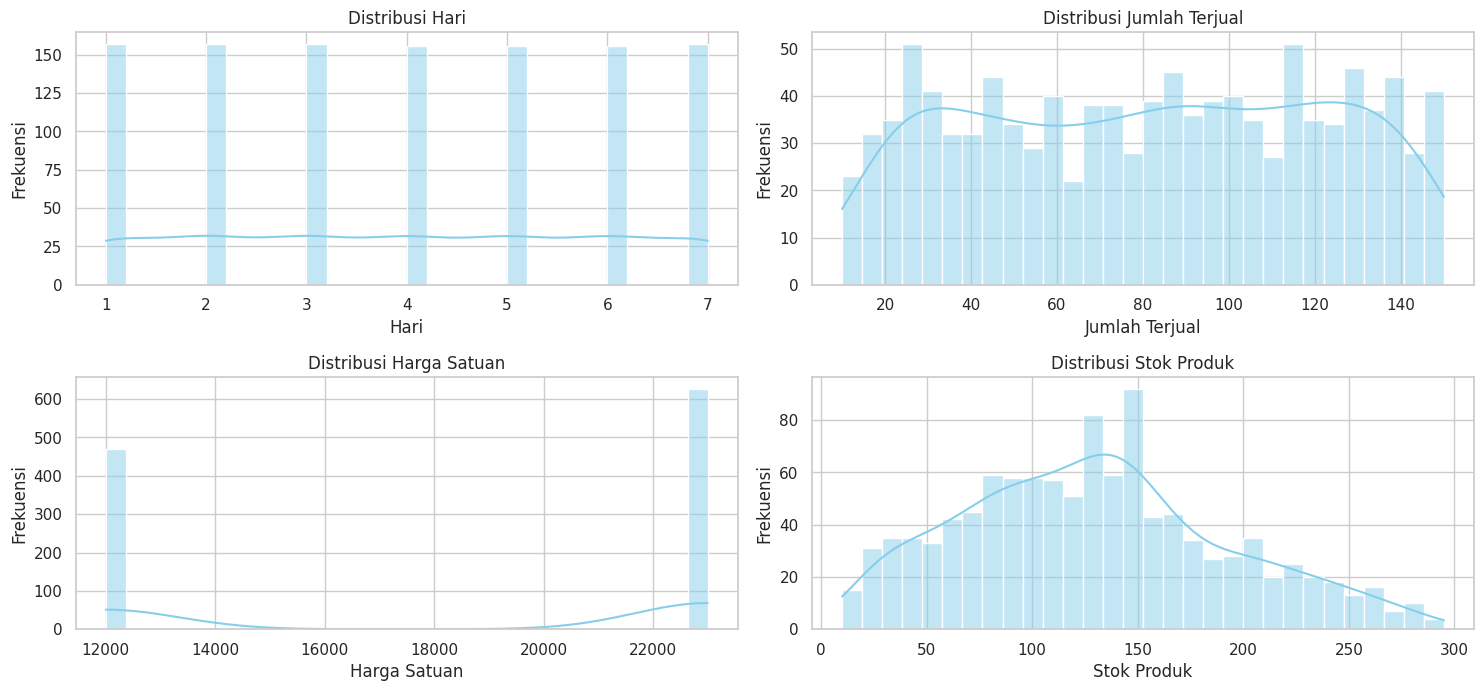

In [ ]:
# Visualisasi distribusi data numerik dengan histogram
sns.set(style="whitegrid")

numeric_cols = ['Hari', 'Jumlah Terjual', 'Harga Satuan', 'Stok Produk']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Dari visualisasi di atas, dapat disimpulkan bahwa:

- Distribusi hari menunjukkan frekuensi yang hampir merata dari hari 1 hingga hari 7, menandakan tidak ada perbedaan signifikan dalam jumlah data per hari.
- Distribusi jumlah terjual cenderung normal dan merata dengan sedikit kecenderungan ke sisi kanan, menunjukkan bahwa sebagian besar produk terjual dalam rentang 40–140 unit per hari.
- Distribusi harga satuan menunjukkan hanya dua puncak yang dominan, yaitu di Rp12.000 dan Rp23.000, mencerminkan bahwa produk-produk yang dijual memiliki dua kategori harga yang sangat konsisten.
- Distribusi stok produk cenderung skewed ke kanan (positif), artinya ada lebih banyak produk dengan stok menengah hingga tinggi, namun masih terdapat sebagian kecil produk dengan stok yang sangat tinggi.

### Mendeteksi Outlier

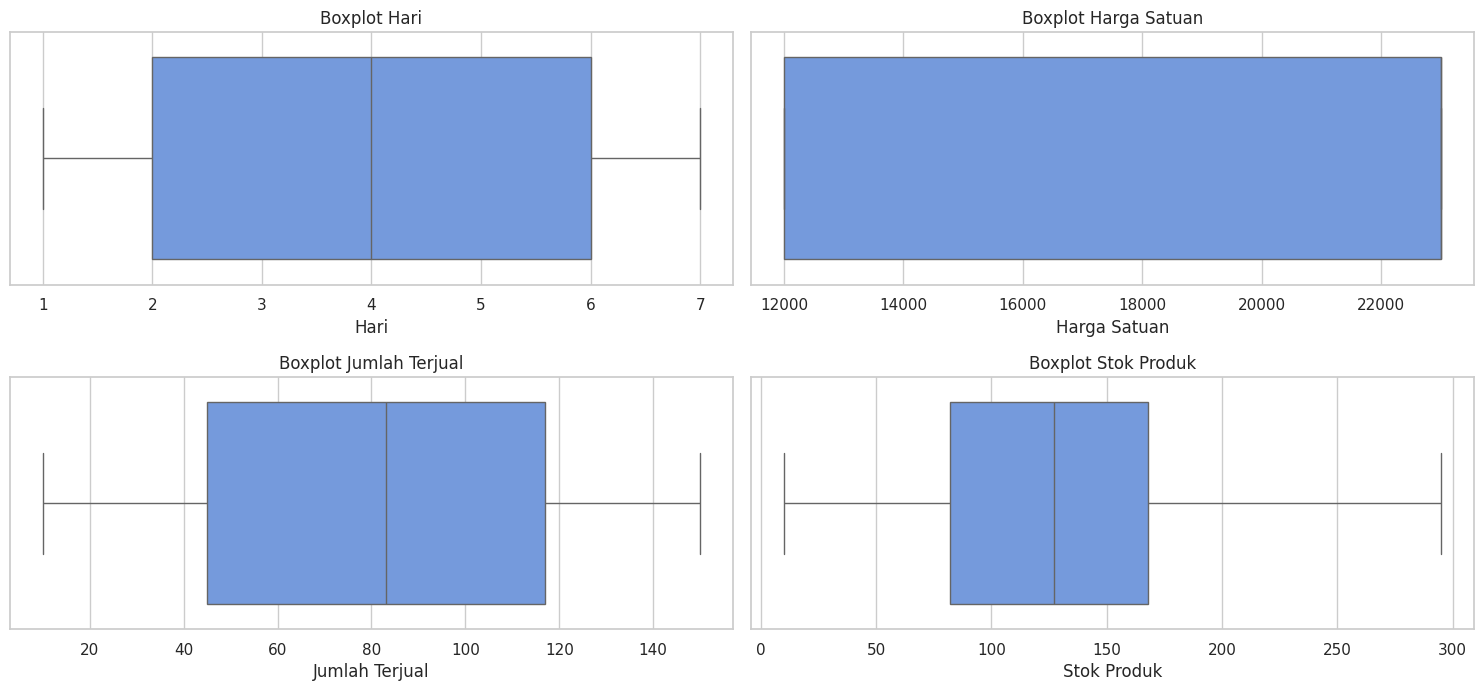

In [ ]:
# Menampilkan boxplot untuk mendeteksi outlier pada data numerik
plt.figure(figsize=(15, 10))

boxplot = ['Hari', 'Harga Satuan', 'Jumlah Terjual', 'Stok Produk']

for i, col in enumerate(boxplot):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col], color='cornflowerblue')
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Dari visualisasi boxplot di atas, dapat disimpulkan bahwa:

- Distribusi Hari menunjukkan pola yang merata dari hari ke-1 hingga hari ke-7, dengan median berada di hari ke-4, menandakan tidak ada hari tertentu yang mendominasi aktivitas penjualan.

- Distribusi Harga Satuan memiliki dua rentang harga utama, yaitu sekitar Rp12.000 dan Rp23.000, dan semuanya berada dalam rentang normal tanpa outlier. Ini mengindikasikan adanya dua kategori harga produk yang konsisten.

- Distribusi Jumlah Terjual memiliki sebaran yang cukup lebar, mulai dari sekitar 10 hingga 150 unit. Tidak ditemukan outlier, yang menunjukkan kestabilan volume penjualan harian.

- Distribusi Stok Produk menunjukkan kisaran stok dari sekitar 10 hingga hampir 300 unit. Sebaran cukup lebar namun tetap dalam batas wajar dan tidak terdapat nilai ekstrem.



In [ ]:
# Mengecek outlier yang ada pada kolom numerik
kolom_numerik = ['Hari', 'Harga Satuan', 'Jumlah Terjual', 'Stok Produk']

# Mengecek outlier pada setiap kolom
for kolom in kolom_numerik:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outlier = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]

    print(f"\nKolom: {kolom}")
    print(f"Jumlah outlier: {len(outlier)}")
    if not outlier.empty:
        print(outlier[[kolom]].head())


Kolom: Hari
Jumlah outlier: 0

Kolom: Harga Satuan
Jumlah outlier: 0

Kolom: Jumlah Terjual
Jumlah outlier: 0

Kolom: Stok Produk
Jumlah outlier: 0


### Correlation Matrix

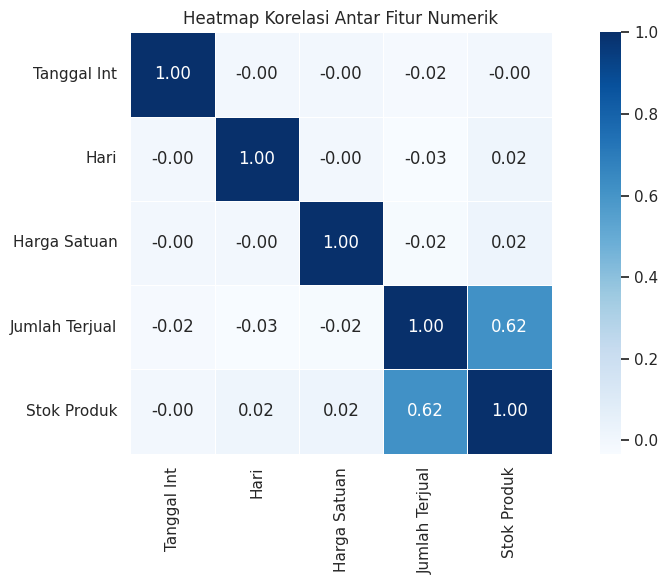

In [ ]:
# Menampilkan heatmap untuk melihat korelasi antar fitur numerik
numeric_features = ['Tanggal Int', 'Hari', 'Harga Satuan', 'Jumlah Terjual', 'Stok Produk']

corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    fmt=".2f",
    linewidths=0.5,
    square=True
)

plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.tight_layout()
plt.show()

Berdasarkan heatmap korelasi, terlihat bahwa sebagian besar fitur numerik memiliki hubungan korelasi yang sangat rendah (mendekati nol). Satu-satunya korelasi yang cukup kuat adalah antara Jumlah Terjual dan Stok Produk dengan nilai korelasi sebesar 0.62, yang menunjukkan adanya hubungan positif sedang, itu artinya semakin tinggi stok, cenderung semakin banyak produk yang terjual. Sisanya, seperti Hari, Harga Satuan, dan Tanggal Int, memiliki korelasi sangat lemah terhadap fitur lain.

### Feature Engineering

In [ ]:
# Membuat kolom status stok berdasarkan selisih antara stok produk dan jumlah terjual
def get_status_stok(row):
    selisih = row['Stok Produk'] - row['Jumlah Terjual']
    if selisih <= 0:
        return 'Understock'
    elif selisih > 50:
        return 'Overstock'
    else:
        return 'Normal'

df['Status Stok'] = df.apply(get_status_stok, axis=1)

print(df[['Nama Produk', 'Jumlah Terjual', 'Stok Produk', 'Status Stok']].head())

          Nama Produk  Jumlah Terjual  Stok Produk Status Stok
0        Bolen Coklat              38          130   Overstock
1        Bolen Banana              80          125      Normal
2      Bolen Proltape              45           89      Normal
3   Bolen Coklat Keju             149          150      Normal
4  Bolen Cokju (Mini)             118          118  Understock


Fitur Status Stok dibuat berdasarkan selisih antara Stok Produk dan Jumlah Terjual. Tujuannya adalah untuk mengkategorikan kondisi stok menjadi tiga kelas:

- Understock: jika stok kurang atau habis (≤ 0),

- Normal: jika stok masih dalam batas aman (1 hingga 50),

- Overstock: jika stok berlebih (> 50).

Fitur ini penting untuk membantu dalam analisis ketersediaan produk, mengidentifikasi potensi kekurangan dan kelebihan stok dan fitur ini juga dapat dijadikan target variabel untuk model klasifikasi machine learning seperti Random Forest Classifier.

In [ ]:
# Menampilkan proporsi tiap kategori status stok dalam bentuk persentase
print(df['Status Stok'].value_counts(normalize=True))

Status Stok
Overstock     0.392336
Understock    0.335766
Normal        0.271898
Name: proportion, dtype: float64


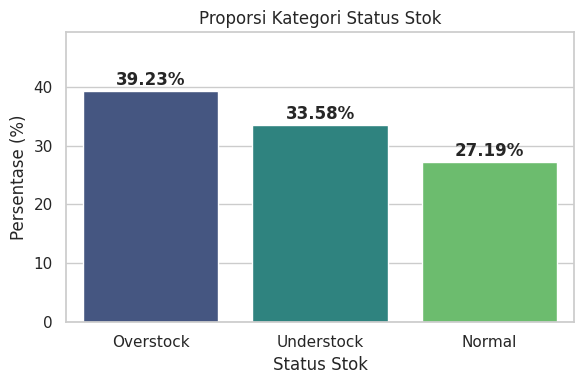

In [ ]:
# Menghitung frekuensi tiap kategori status stok
status_counts = df['Status Stok'].value_counts(normalize=True)
status_percent = status_counts * 100

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=status_percent.index, y=status_percent.values, palette='viridis')

for i, v in enumerate(status_percent.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.title('Proporsi Kategori Status Stok')
plt.xlabel('Status Stok')
plt.ylabel('Persentase (%)')
plt.ylim(0, max(status_percent.values) + 10)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, proporsi kategori Status Stok menunjukkan bahwa sebagian besar data berada pada kondisi Overstock (39.23%), diikuti oleh Understock (33.58%), dan hanya 27.19% yang berada pada kondisi stok Normal. Hal ini mengindikasikan bahwa mayoritas stok belum dikelola secara optimal, dengan kecenderungan terjadi kelebihan atau kekurangan stok yang dapat berdampak pada efisiensi operasional dan potensi kehilangan penjualan.

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Mengubah fitur Status Stok menjadi nilai numerik menggunakan LabelEncoder
le_status = LabelEncoder()
df['Status Stok Encoded'] = le_status.fit_transform(df['Status Stok'])
print(df[['Status Stok', 'Status Stok Encoded']].drop_duplicates())

  Status Stok  Status Stok Encoded
0   Overstock                    1
1      Normal                    0
4  Understock                    2


Selanjutnya, mengubah nilai kategorikal pada kolom Status Stok menjadi bentuk numerik menggunakan Label Encoder, menghasilkan kolom baru bernama Status Stok Encoded. Tujuan dari proses ini adalah agar data dapat diproses oleh algoritma machine learning yang umumnya tidak menerima input bertipe string atau kategorikal. Encoding ini memungkinkan model memahami nilai kategori dalam format yang dapat dihitung dan dianalisis.

In [ ]:
# Mengubah fitur Nama Produk menjadi nilai numerik menggunakan LabelEncoder
le = LabelEncoder()
df['Nama Produk Encoded'] = le.fit_transform(df['Nama Produk'])
print(df[['Nama Produk', 'Nama Produk Encoded']].drop_duplicates())

           Nama Produk  Nama Produk Encoded
0         Bolen Coklat                    2
1         Bolen Banana                    0
2       Bolen Proltape                    6
3    Bolen Coklat Keju                    3
4   Bolen Cokju (Mini)                    1
5    Bolen Keju (Mini)                    4
6  Bolen Pisang Coklat                    5


Kolom Nama Produk di encoding dengan tujuan untuk mempermudah proses analisis dan pemodelan saat pemilihan fitur dan target variabel. Dengan mengubah nama produk ke bentuk numerik, model bisa memahami dan memproses fitur tersebut dalam proses pelatihan dan prediksi.

### Data Split

In [ ]:
# Split data menjadi 80% data training dan 20% data testing
fitur_rfc = df[['Tanggal Int', 'Hari', 'Nama Produk Encoded', 'Harga Satuan', 'Stok Produk', 'Jumlah Terjual']]
target_rfc = df['Status Stok Encoded']

X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(
    fitur_rfc,
    target_rfc,
    test_size=0.2,
    random_state=42,
    stratify=target_rfc
)

Data dibagi menjadi dua bagian: 80% untuk training dan 20% untuk testing. Proses ini dilakukan untuk memisahkan data yang akan digunakan untuk melatih model dan mengevaluasi performa model.

Teknik stratified splitting digunakan agar distribusi kelas pada target Status Stok Encoded tetap seimbang di kedua subset. Ini penting untuk mencegah model menjadi bias terhadap kelas tertentu, terutama ketika dataset memiliki ketidakseimbangan antar kelas.

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Menyeimbangkan data target dengan SMOTE dan cek distribusinya
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_rfc, y_train_rfc)

print("Distribusi sebelum SMOTE:\n", pd.Series(y_train_rfc).value_counts())
print("\nDistribusi setelah SMOTE:\n", pd.Series(y_train_smote).value_counts())

Distribusi sebelum SMOTE:
 Status Stok Encoded
1    344
2    294
0    238
Name: count, dtype: int64

Distribusi setelah SMOTE:
 Status Stok Encoded
1    344
2    344
0    344
Name: count, dtype: int64


Sebelum diterapkannya SMOTE, distribusi kelas pada target Status Stok Encoded terlihat tidak seimbang, di mana kelas 1 (Overstock) mendominasi dengan 344 data, kelas 2 (Understock) memiliki 294 data, sementara kelas 0 (Normal) hanya memiliki 238 data. Ketidakseimbangan ini dapat menyebabkan model cenderung bias dan kurang akurat dalam memprediksi kelas minoritas.

Setelah dilakukan SMOTE (Synthetic Minority Over-sampling Technique), jumlah data untuk setiap kelas disamakan menjadi 344, menghasilkan dataset yang seimbang. Dengan data yang seimbang, model klasifikasi memiliki peluang yang lebih adil dalam mempelajari pola dari setiap kelas dan menghasilkan prediksi yang lebih akurat dan tidak bias terhadap kelas mayoritas.

### Data Modelling

In [ ]:
# Melatih model dan melakukan prediksi pada data uji
model_rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rfc.fit(X_train_smote, y_train_smote)

y_pred_rfc = model_rfc.predict(X_test_rfc)

### Data Evaluation

In [ ]:
# Menampilkan metrik evaluasi model
accuracy = accuracy_score(y_test_rfc, y_pred_rfc)
precision = precision_score(y_test_rfc, y_pred_rfc, average='weighted')
recall = recall_score(y_test_rfc, y_pred_rfc, average='macro')
f1 = f1_score(y_test_rfc, y_pred_rfc, average='macro')

# Output hasil evaluasi
print("Accuracy :", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall   :", round(recall, 2))
print("F1 Score :", round(f1, 2))

Accuracy : 0.93
Precision: 0.93
Recall   : 0.92
F1 Score : 0.93


Model klasifikasi yang dibangun menunjukkan performa yang bagus dengan akurasi, precision, dan F1 score sebesar 93%, serta recall sebesar 92%. Hasil ini mengindikasikan bahwa model mampu mengklasifikasikan status stok produk secara konsisten, baik dalam mengenali maupun memprediksi kategori dengan akurasi tinggi.

### Confusion Matrix

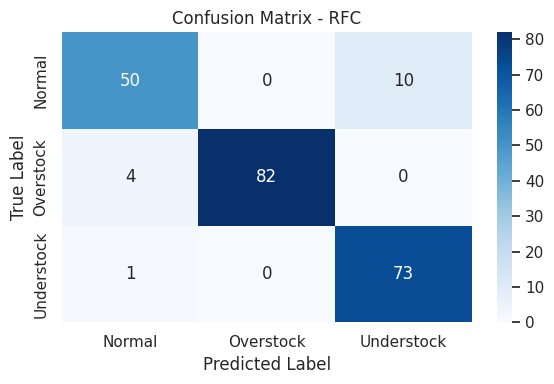

In [ ]:
# Menampilkan confusion matrix untuk mengevaluasi model Random Forest Classifier
cm = confusion_matrix(y_test_rfc, y_pred_rfc)

label_kelas = ['Normal', 'Overstock', 'Understock']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_kelas, yticklabels=label_kelas)
plt.title('Confusion Matrix - RFC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

Model mampu mengklasifikasikan sebagian besar data dengan benar, ditunjukkan oleh tingginya nilai diagonal (benar prediksi):

- 50 data kategori Normal diprediksi dengan benar.

- 82 data kategori Overstock diprediksi dengan benar.

- 73 data kategori Understock diprediksi dengan benar.

Kesalahan klasifikasi terjadi sebagian kecil:

- 10 data kategori Normal diprediksi sebagai Understock.

- 4 data Overstock diprediksi sebagai Normal.

- 1 data Understock diprediksi sebagai Normal.

Secara keseluruhan, confusion matrix ini menunjukkan bahwa model Random Forest Classifier memiliki performa klasifikasi yang sangat baik, dengan jumlah prediksi yang salah relatif kecil dibandingkan total data.

In [ ]:
# Menghitung dan menampilkan TP, FP, FN, TN untuk setiap kelas
labels = np.unique(y_test_rfc)
metrics = []

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    metrics.append({
        'Class': label_kelas[i],
        'True Positive': TP,
        'False Positive': FP,
        'False Negative': FN,
        'True Negative': TN
    })

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

        Class  True Positive  False Positive  False Negative  True Negative
0      Normal             50               5              10            155
1   Overstock             82               0               4            134
2  Understock             73              10               1            136


### Classification Report

In [ ]:
# Menampilkan Classification Report dari model RFC
print(classification_report(y_test_rfc, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        60
           1       1.00      0.95      0.98        86
           2       0.88      0.99      0.93        74

    accuracy                           0.93       220
   macro avg       0.93      0.92      0.93       220
weighted avg       0.93      0.93      0.93       220



<Axes: >

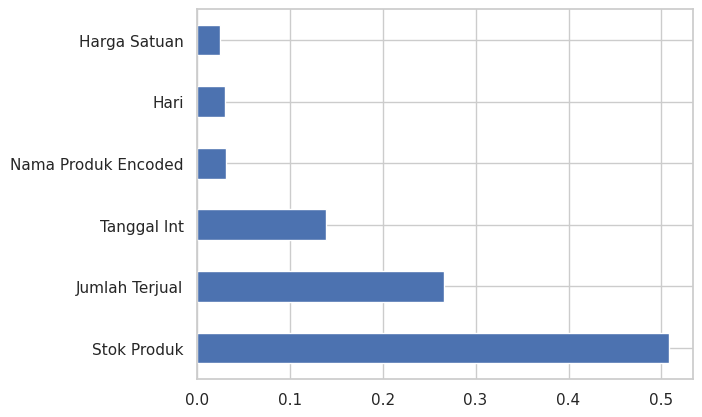

In [ ]:
# Visualisasi fitur yang paling berpengaruh dalam prediksi model Random Forest.
importances = model_rfc.feature_importances_
features = X_train_rfc.columns
pd.Series(importances, index=features).sort_values(ascending=False).plot(kind='barh')

Berdasarkan grafik feature importance dari model Random Forest Classifier, fitur yang paling berpengaruh terhadap hasil prediksi adalah Stok Produk dan Jumlah Terjual, yang menunjukkan bahwa kondisi awal stok dan angka penjualan sangat menentukan status stok akhir (understock, normal, atau overstock). Sementara itu, fitur seperti Tanggal Int memiliki pengaruh sedang, menunjukkan adanya pola waktu tertentu. Fitur lain seperti Nama Produk Encoded, Hari, dan Harga Satuan memiliki kontribusi rendah, sehingga perannya terhadap prediksi stok relatif kecil.

In [ ]:
import json

# Menyimpan hasil evaluasi model
evaluasi_model = {
    "Accuracy": round(accuracy, 2),
    "Precision": round(precision, 2),
    "Recall": round(recall, 2),
    "F1_Score": round(f1, 2)
}

# Simpan ke file JSON
with open("evaluasi_model.json", "w") as f:
    json.dump(evaluasi_model, f)

In [ ]:
import joblib

# Simpan model
joblib.dump(model_rfc, 'model_rfc_bolen.pkl')

['model_rfc_bolen.pkl']

In [ ]:
from google.colab import files
files.download('model_rfc_bolen.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_csv('dataset_bolen_2021_2024.csv', index=False)

In [ ]:
from google.colab import files
files.download('dataset_bolen_2021_2024.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("evaluasi_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>